mean shift : 밀도 기반 클러스터링

In [1]:
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.cluster import MeanShift

In [2]:
iris = load_iris()
iris_pca = PCA(n_components=2).fit_transform(iris.data)

In [3]:
type(iris)

sklearn.utils._bunch.Bunch

In [4]:
# bandwidth : 커널함수의 영역
model = MeanShift()

In [5]:
model.fit(iris_pca)

Exception in thread Thread-4 (_readerthread):
Traceback (most recent call last):
  File "c:\Users\user\anaconda3\envs\multi02\Lib\threading.py", line 1081, in _bootstrap_inner
    self._context.run(self.run)
    ~~~~~~~~~~~~~~~~~^^^^^^^^^^
  File "c:\Users\user\anaconda3\envs\multi02\Lib\site-packages\ipykernel\ipkernel.py", line 772, in run_closure
    _threading_Thread_run(self)
    ~~~~~~~~~~~~~~~~~~~~~^^^^^^
  File "c:\Users\user\anaconda3\envs\multi02\Lib\threading.py", line 1023, in run
    self._target(*self._args, **self._kwargs)
    ~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\user\anaconda3\envs\multi02\Lib\subprocess.py", line 1613, in _readerthread
    buffer.append(fh.read())
                  ~~~~~~~^^
  File "<frozen codecs>", line 325, in decode
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc0 in position 4: invalid start byte


,bandwidth,None
,seeds,None
,bin_seeding,False
,min_bin_freq,1
,cluster_all,True
,n_jobs,None
,max_iter,300


In [6]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [7]:
model.cluster_centers_

array([[ 1.17642311, -0.12033282],
       [-2.64344511,  0.19056564]])

<Axes: >

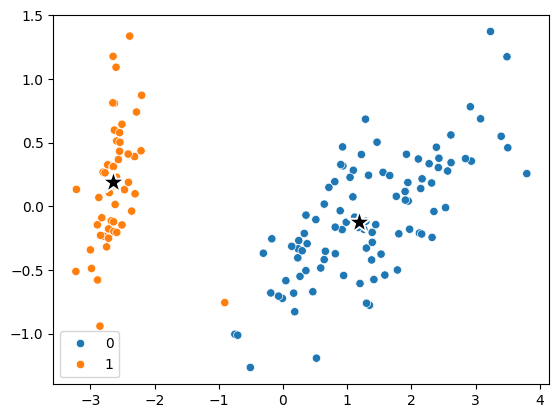

In [8]:
sns.scatterplot(x=iris_pca[:, 0] , y=iris_pca[:, 1], hue=model.labels_)
sns.scatterplot(x=model.cluster_centers_[:, 0], y=model.cluster_centers_[:, 1],
                color="k", marker="*", s=300)

mean(평균)을 구해서 shift(이동)

시작 포인트에서 bandwidth(대역폭) 안의 밀도를 구함 (KDE - Kernel Density Estimation, 커널 밀도 추정)
- 커널 밀도 추정을 통해 커널 밀도 함수를 구하고, 밀도가 높은 쪽으로 이롣
- 더 이상 움직이지 않으면 학습 종료